## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
file_path = r"C:\Users\samee\OneDrive\Desktop\AWS SAGEMAKER PROJECT\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-15,Delhi,Cochin,17:05:00,22:15:00,310,1.0,No Info,6027
1,Multiple Carriers,2019-05-15,Delhi,Cochin,07:10:00,22:30:00,920,1.0,No Info,6513
2,Air India,2019-06-18,Delhi,Cochin,18:05:00,21:10:00,185,0.0,No Info,5201
3,Multiple Carriers,2019-05-27,Delhi,Cochin,12:50:00,21:00:00,490,1.0,No Info,7005
4,Multiple Carriers,2019-03-03,Delhi,Cochin,16:00:00,01:35:00,575,1.0,No Info,21226
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-12,Banglore,New Delhi,18:55:00,16:10:00,1275,1.0,In-flight meal not included,11087
636,Indigo,2019-05-12,Banglore,Delhi,07:10:00,10:05:00,175,0.0,No Info,4823
637,Multiple Carriers,2019-03-09,Delhi,Cochin,06:50:00,19:15:00,745,1.0,In-flight meal not included,14817
638,Air India,2019-03-01,Banglore,New Delhi,05:50:00,16:20:00,630,2.0,Change airports,15119


### 2.1 Fixing Data Types

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

### The .assign() method is used to create a new DataFrame by adding or modifying columns without altering the original DataFrame.

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-15,Delhi,Cochin,2024-11-17 17:05:00,2024-11-17 22:15:00,310,1.0,No Info,6027
1,Multiple Carriers,2019-05-15,Delhi,Cochin,2024-11-17 07:10:00,2024-11-17 22:30:00,920,1.0,No Info,6513
2,Air India,2019-06-18,Delhi,Cochin,2024-11-17 18:05:00,2024-11-17 21:10:00,185,0.0,No Info,5201
3,Multiple Carriers,2019-05-27,Delhi,Cochin,2024-11-17 12:50:00,2024-11-17 21:00:00,490,1.0,No Info,7005
4,Multiple Carriers,2019-03-03,Delhi,Cochin,2024-11-17 16:00:00,2024-11-17 01:35:00,575,1.0,No Info,21226
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-12,Banglore,New Delhi,2024-11-17 18:55:00,2024-11-17 16:10:00,1275,1.0,In-flight meal not included,11087
636,Indigo,2019-05-12,Banglore,Delhi,2024-11-17 07:10:00,2024-11-17 10:05:00,175,0.0,No Info,4823
637,Multiple Carriers,2019-03-09,Delhi,Cochin,2024-11-17 06:50:00,2024-11-17 19:15:00,745,1.0,In-flight meal not included,14817
638,Air India,2019-03-01,Banglore,New Delhi,2024-11-17 05:50:00,2024-11-17 16:20:00,630,2.0,Change airports,15119


## 3. High-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      639 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,639.000000,640.000000
mean,652.859375,0.815336,9225.129688
std,502.167317,0.672116,4429.815807
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5554.000000
50%,550.000000,1.000000,8586.000000
75%,930.000000,1.000000,12373.000000
max,2315.000000,3.000000,34608.000000


In [8]:
train.describe(include="object")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,226,280,280,485


## We want to add total stops also as object datatype lets see how to do it

In [10]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,639.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,226,280,280,338.0,485


## 4. High-level analysis of Missing Values

In [11]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.15625


In [12]:
temp = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Titanic.csv")

eda_helper_functions.missing_info(temp)

,count,percentage
variable,,
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


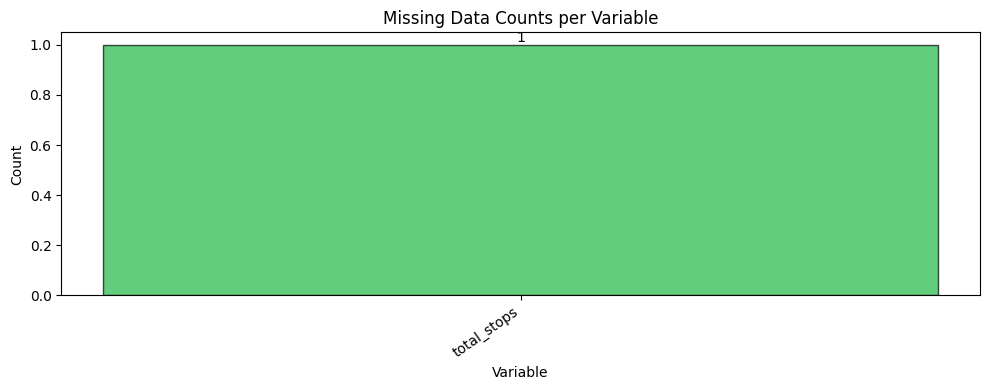

In [13]:
eda_helper_functions.plot_missing_info(train)

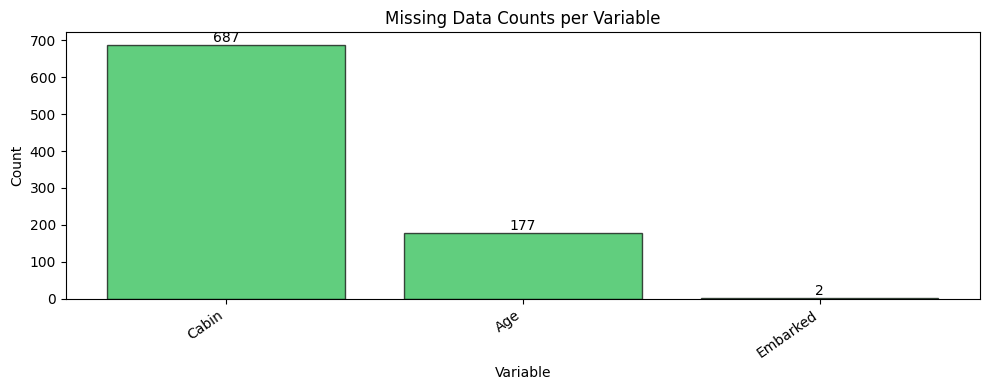

In [14]:
eda_helper_functions.plot_missing_info(temp)

In [15]:
import eda_helper_functions
import importlib

# Reload the module to reflect changes made to it
importlib.reload(eda_helper_functions)

eda_helper_functions.remove_missing_info(train, threshold_pct=0)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-15,Delhi,Cochin,2024-11-17 17:05:00,2024-11-17 22:15:00,310,1.0,No Info,6027
1,Multiple Carriers,2019-05-15,Delhi,Cochin,2024-11-17 07:10:00,2024-11-17 22:30:00,920,1.0,No Info,6513
2,Air India,2019-06-18,Delhi,Cochin,2024-11-17 18:05:00,2024-11-17 21:10:00,185,0.0,No Info,5201
3,Multiple Carriers,2019-05-27,Delhi,Cochin,2024-11-17 12:50:00,2024-11-17 21:00:00,490,1.0,No Info,7005
4,Multiple Carriers,2019-03-03,Delhi,Cochin,2024-11-17 16:00:00,2024-11-17 01:35:00,575,1.0,No Info,21226
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-12,Banglore,New Delhi,2024-11-17 18:55:00,2024-11-17 16:10:00,1275,1.0,In-flight meal not included,11087
636,Indigo,2019-05-12,Banglore,Delhi,2024-11-17 07:10:00,2024-11-17 10:05:00,175,0.0,No Info,4823
637,Multiple Carriers,2019-03-09,Delhi,Cochin,2024-11-17 06:50:00,2024-11-17 19:15:00,745,1.0,In-flight meal not included,14817
638,Air India,2019-03-01,Banglore,New Delhi,2024-11-17 05:50:00,2024-11-17 16:20:00,630,2.0,Change airports,15119


## 5. High-level analysis of Outliers

In [16]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [17]:
from sklearn.impute import SimpleImputer

# Impute missing values using the column mean (you can change this to median or other strategies)
imputer = SimpleImputer(strategy="mean")
train_imputed = train.copy()
train_imputed[train_imputed.select_dtypes(include="number").columns] = imputer.fit_transform(
    train_imputed.select_dtypes(include="number")
)
(
    train_imputed
    .assign(outlier=forest.fit_predict(                 #Here we create new column 'outlier'
        train_imputed
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")     #query used to filter our dataset
    #.duration
	# .describe()
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Air India,2019-06-18,Delhi,Cochin,2024-11-17 18:05:00,2024-11-17 21:10:00,185.0,0.0,No Info,5201.0,-1
9,Multiple Carriers,2019-03-06,Delhi,Cochin,2024-11-17 15:05:00,2024-11-17 01:35:00,630.0,2.0,No Info,21483.0,-1
13,Jet Airways,2019-05-09,Kolkata,Banglore,2024-11-17 17:00:00,2024-11-17 18:00:00,1500.0,1.0,In-flight meal not included,7341.0,-1
16,Air India,2019-04-01,Mumbai,Hyderabad,2024-11-17 19:30:00,2024-11-17 20:45:00,75.0,0.0,No Info,2050.0,-1
17,Air India,2019-03-06,Banglore,New Delhi,2024-11-17 11:50:00,2024-11-17 08:55:00,1265.0,1.0,No Info,14594.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
631,Jet Airways,2019-05-09,Delhi,Cochin,2024-11-17 23:05:00,2024-11-17 19:00:00,1195.0,2.0,No Info,15129.0,-1
633,Jet Airways,2019-05-09,Delhi,Cochin,2024-11-17 21:50:00,2024-11-17 19:00:00,1270.0,1.0,In-flight meal not included,12373.0,-1
635,Jet Airways,2019-03-12,Banglore,New Delhi,2024-11-17 18:55:00,2024-11-17 16:10:00,1275.0,1.0,In-flight meal not included,11087.0,-1
638,Air India,2019-03-01,Banglore,New Delhi,2024-11-17 05:50:00,2024-11-17 16:20:00,630.0,2.0,Change airports,15119.0,-1


## 6. Pair Plots

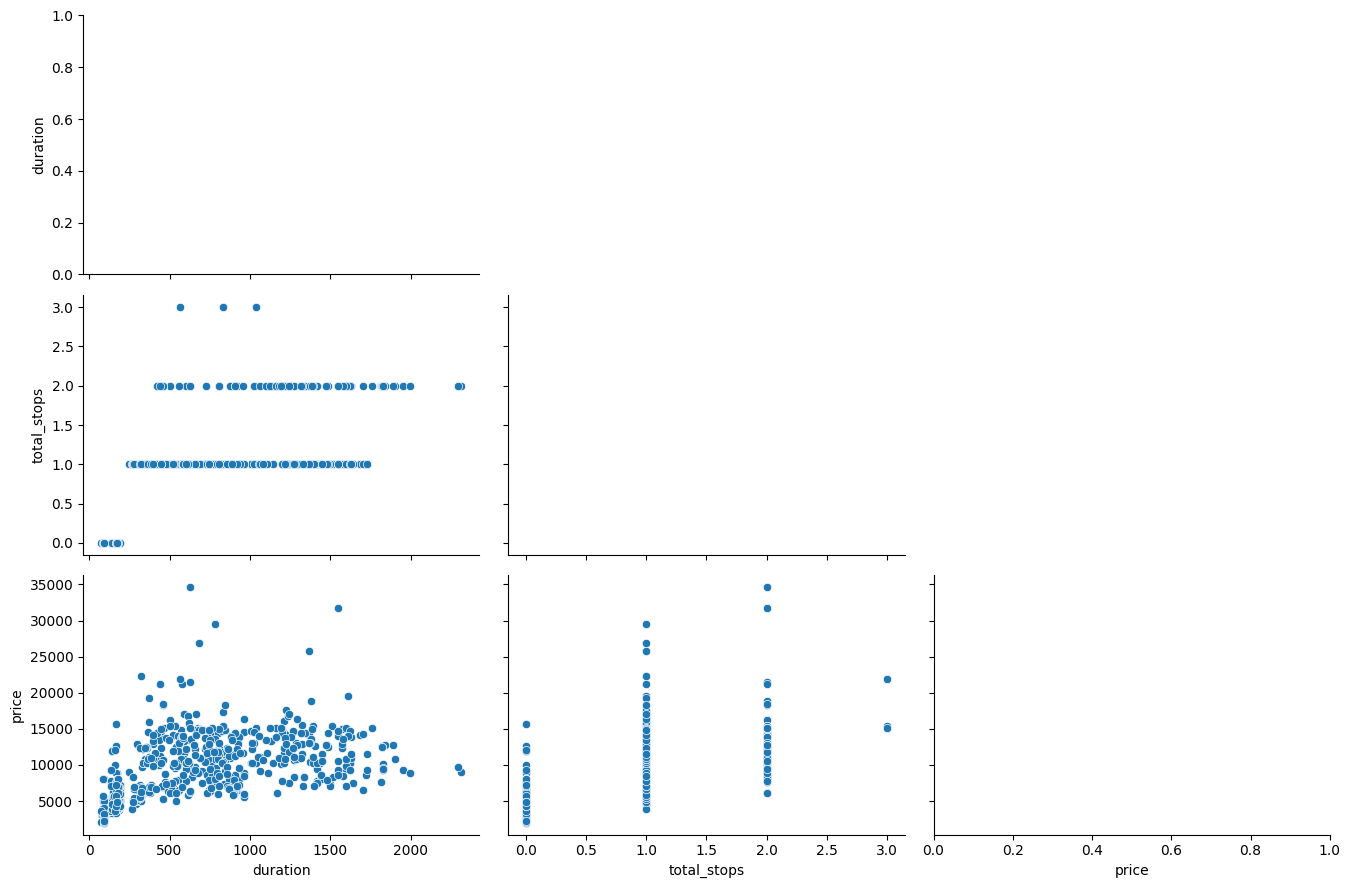

In [18]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

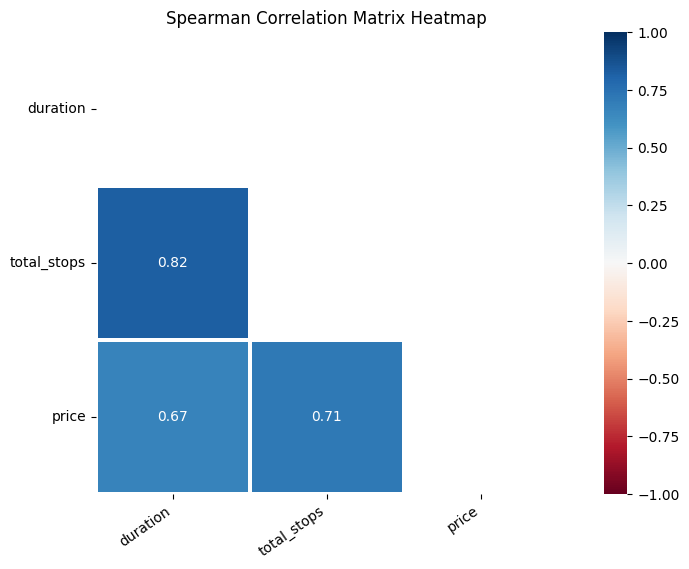

In [19]:
eda_helper_functions.correlation_heatmap(train)   #For numeric features

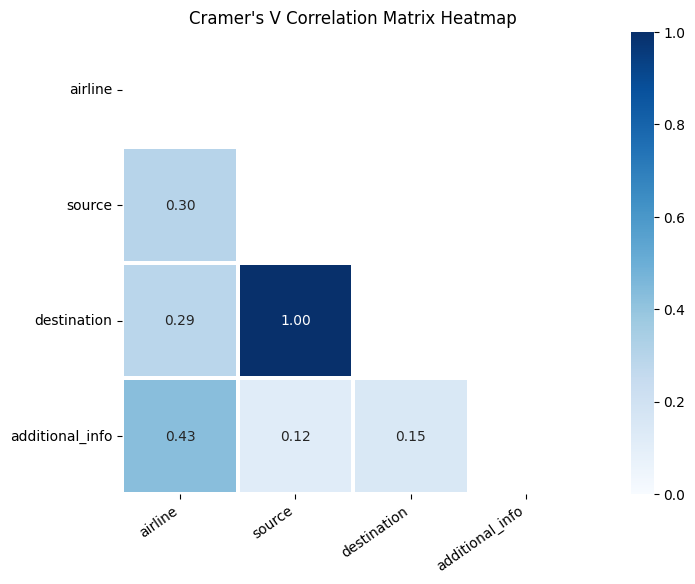

In [20]:
eda_helper_functions.cramersV_heatmap(train)   # For relationship categorical features   Range is 0 to 1

## 8. Detailed Analysis

In [21]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [22]:
train.airline

0                 Indigo
1      Multiple Carriers
2              Air India
3      Multiple Carriers
4      Multiple Carriers
             ...        
635          Jet Airways
636               Indigo
637    Multiple Carriers
638            Air India
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [23]:
eda_helper_functions.cat_summary(train, "airline")  #We have function of categorical summary

0                 Indigo
1      Multiple Carriers
2              Air India
3      Multiple Carriers
4      Multiple Carriers
             ...        
635          Jet Airways
636               Indigo
637    Multiple Carriers
638            Air India
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,226


,count,percentage
category,,
Jet Airways,226,0.353125
Air India,108,0.168750
Indigo,99,0.154688
Multiple Carriers,91,0.142187
Spicejet,50,0.078125
Vistara,33,0.051562
Air Asia,18,0.028125
Goair,15,0.023438


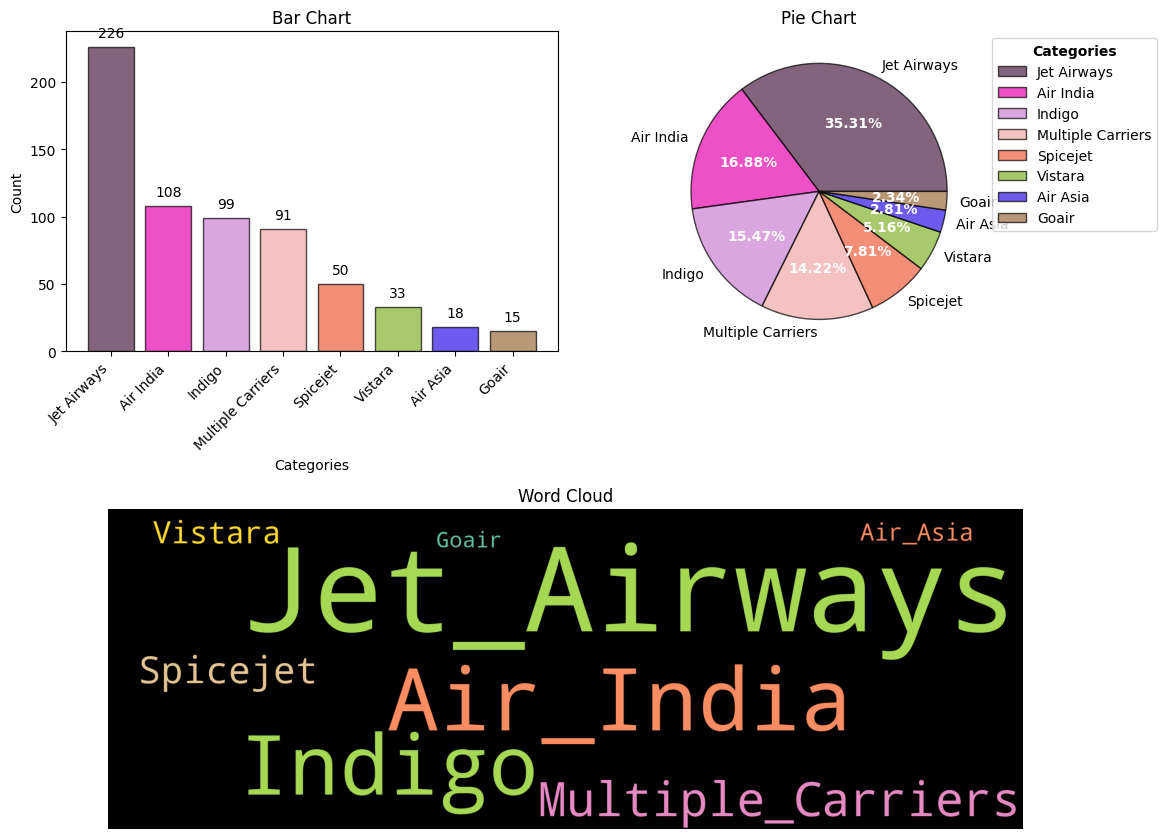

In [24]:
eda_helper_functions.cat_univar_plots(train, "airline")

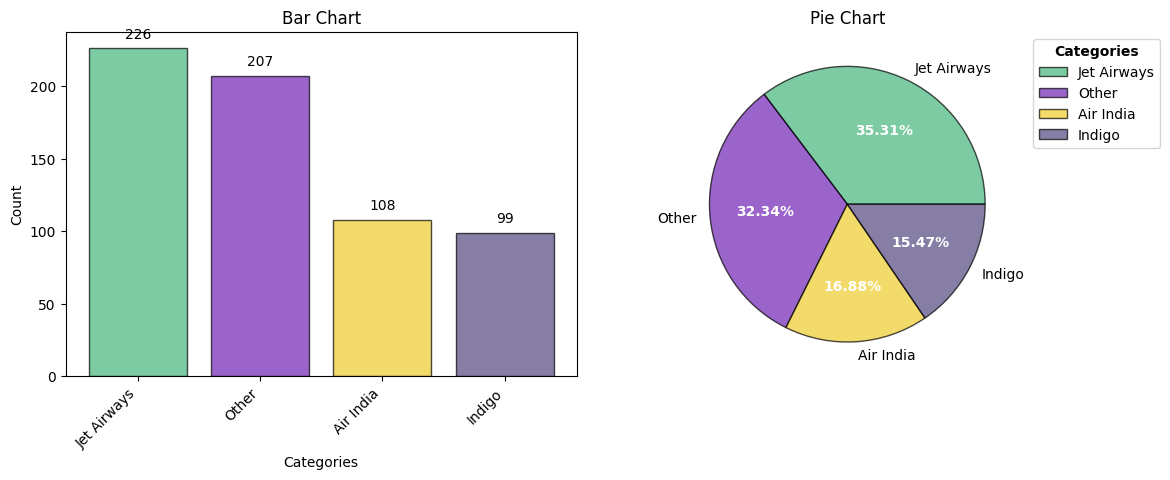

In [25]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)   #k is use for top most categories

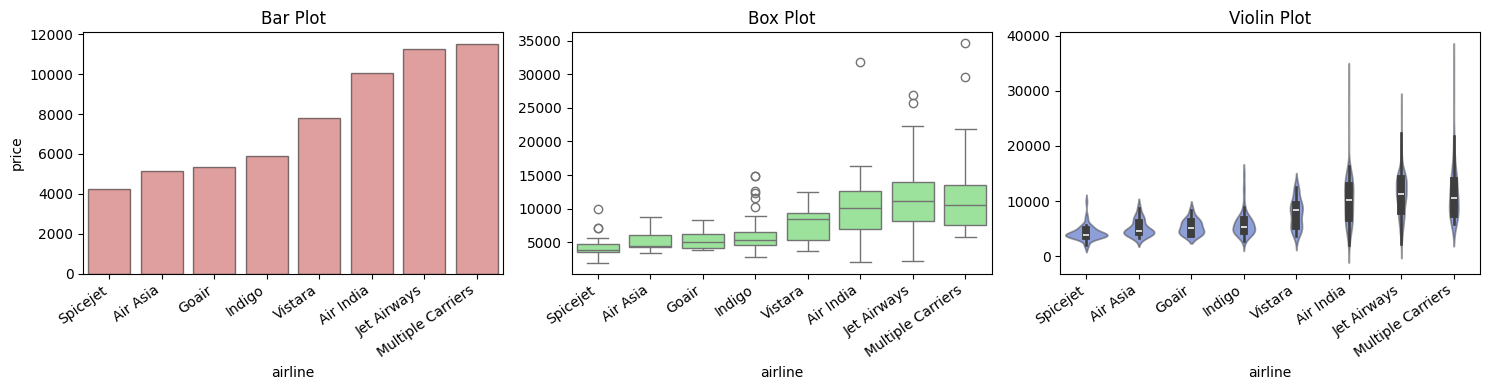

In [27]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)             # Violin plot is mixture of box and kde plot(shows distribution of data, skewness normality)

In [28]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 49.427472834133034
- p-value              : 4.924084801834044e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 283.04762973372465
- p-value              : 2.512873996169626e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


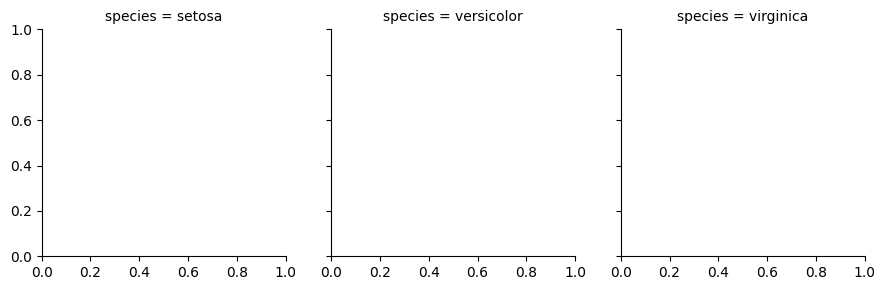

In [29]:
df = sns.load_dataset("iris")

# Create a FacetGrid with species as the categorical variable
g = sns.FacetGrid(df, col="species")
plt.show()

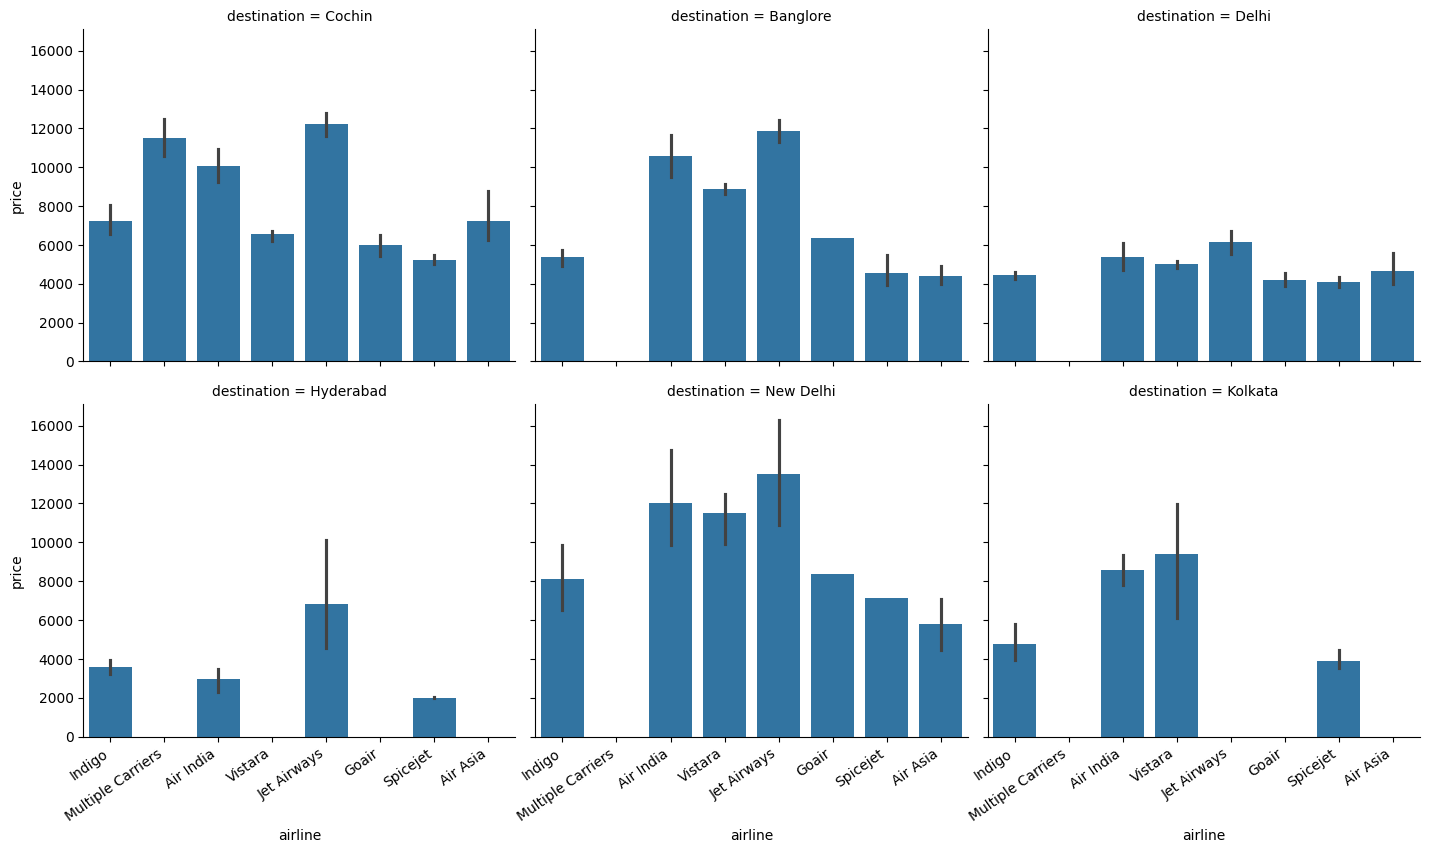

In [30]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [31]:
train.date_of_journey

0     2019-05-15
1     2019-05-15
2     2019-06-18
3     2019-05-27
4     2019-03-03
         ...    
635   2019-03-12
636   2019-05-12
637   2019-03-09
638   2019-03-01
639   2019-05-01
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

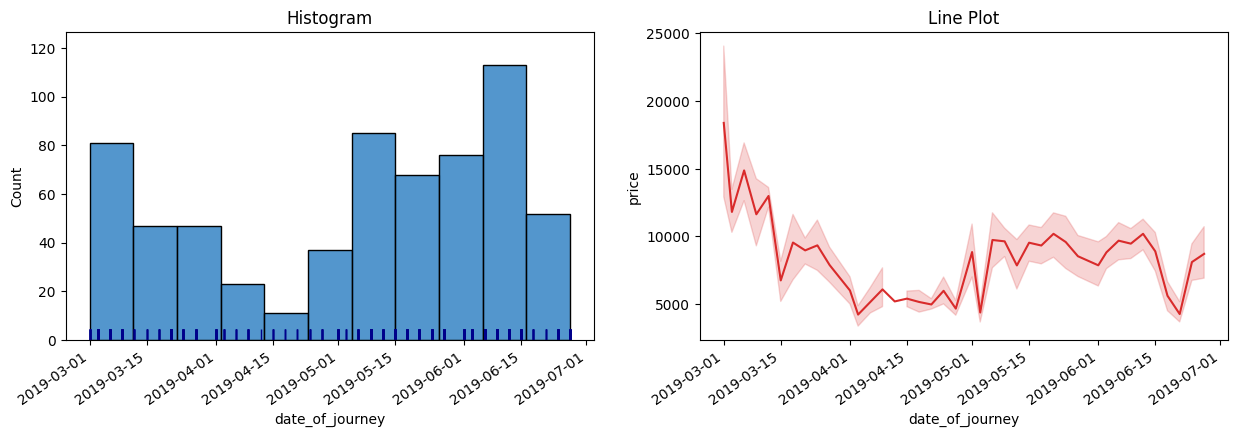

In [32]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

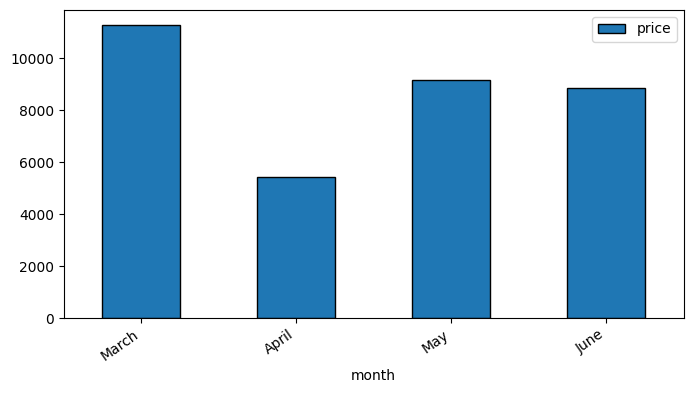

In [33]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))  #Grouper is used like TS analysis to add 'M' as frequency 
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0) # As axis=0 means index name changed to month name
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()  # gca- get current axis
eda_helper_functions.rotate_xlabels(ax)

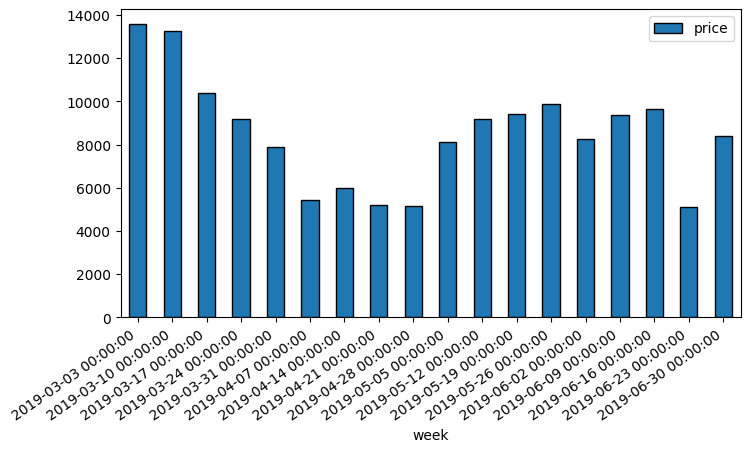

In [34]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"  #Green black color to edges of bar 
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

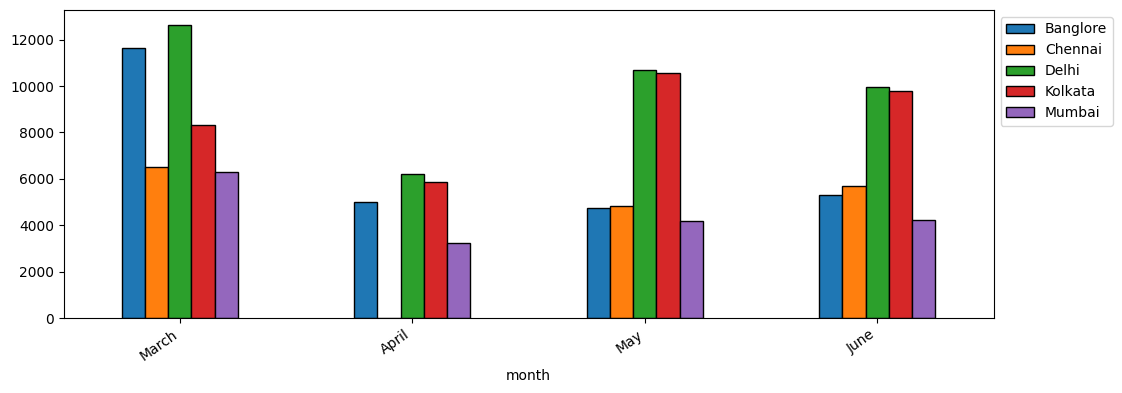

In [35]:
# Depeending on source what is average price

(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])   # to include categorical variable source we add all inside list
	.price.mean()
	.unstack(fill_value=0)   # If we want to move one of axis into column we will use unstack, source from index goes into column, fill replace NaN
	.set_axis(["March", "April", "May", "June"], axis=0)  # change name of rows axis
	.rename_axis(index="month")   #change name of column index
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()  # It grab the current axis

ax.legend(  # We access legend
	loc="upper left",   # legend goes to upper left
	bbox_to_anchor=(1, 1)  #send legend outside the graph
)

eda_helper_functions.rotate_xlabels(ax)

In [36]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "date_of_journey")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 5.792264706920167
- p-value              : 4.6536015810629844e-23
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and date_of_journey are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 151.59888037498868
- p-value              : 3.3951659942882576e-15
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and date_of_journey are associated to each other


### 8.3 dep_time

In [37]:
train.dep_time

0     2024-11-17 17:05:00
1     2024-11-17 07:10:00
2     2024-11-17 18:05:00
3     2024-11-17 12:50:00
4     2024-11-17 16:00:00
              ...        
635   2024-11-17 18:55:00
636   2024-11-17 07:10:00
637   2024-11-17 06:50:00
638   2024-11-17 05:50:00
639   2024-11-17 20:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

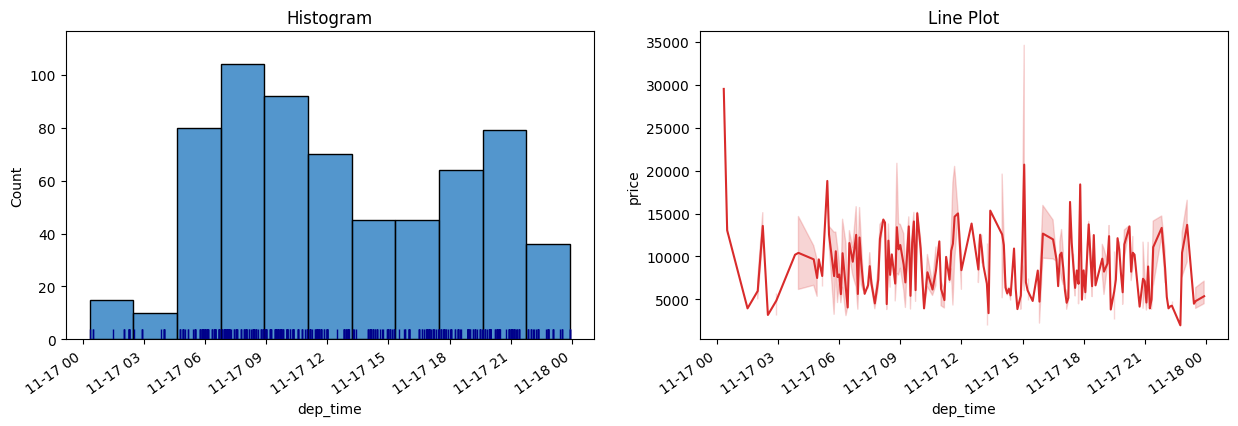

In [38]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

The histogram telling us on which hr how much flights are getting booked. 1st bar shows between night 12 to 3, 7AM to 12 PM most of flights are booked

Let convert these hours into morning, afternoon and evening to check when the flight is booked

The pipe() function in Pandas is a versatile and powerful tool that allows you to chain functions together in a clean and readable way. It is especially useful when you have multiple custom functions that need to be applied sequentially to a DataFrame or Series. Pipe will accept function where input is in series

In [41]:
(
	train
	.assign(dep_time=lambda df_: (  #np.select it takes three argument( 2 list and one default value   # We will change dep_time column
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),   #  <=4 and >12
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")  # If not satisfy three conditions inside list then will add night as default
	))
)    

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-15,Delhi,Cochin,evening,2024-11-17 22:15:00,310,1.0,No Info,6027
1,Multiple Carriers,2019-05-15,Delhi,Cochin,morning,2024-11-17 22:30:00,920,1.0,No Info,6513
2,Air India,2019-06-18,Delhi,Cochin,evening,2024-11-17 21:10:00,185,0.0,No Info,5201
3,Multiple Carriers,2019-05-27,Delhi,Cochin,afternoon,2024-11-17 21:00:00,490,1.0,No Info,7005
4,Multiple Carriers,2019-03-03,Delhi,Cochin,evening,2024-11-17 01:35:00,575,1.0,No Info,21226
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-12,Banglore,New Delhi,evening,2024-11-17 16:10:00,1275,1.0,In-flight meal not included,11087
636,Indigo,2019-05-12,Banglore,Delhi,morning,2024-11-17 10:05:00,175,0.0,No Info,4823
637,Multiple Carriers,2019-03-09,Delhi,Cochin,morning,2024-11-17 19:15:00,745,1.0,In-flight meal not included,14817
638,Air India,2019-03-01,Banglore,New Delhi,morning,2024-11-17 16:20:00,630,2.0,Change airports,15119


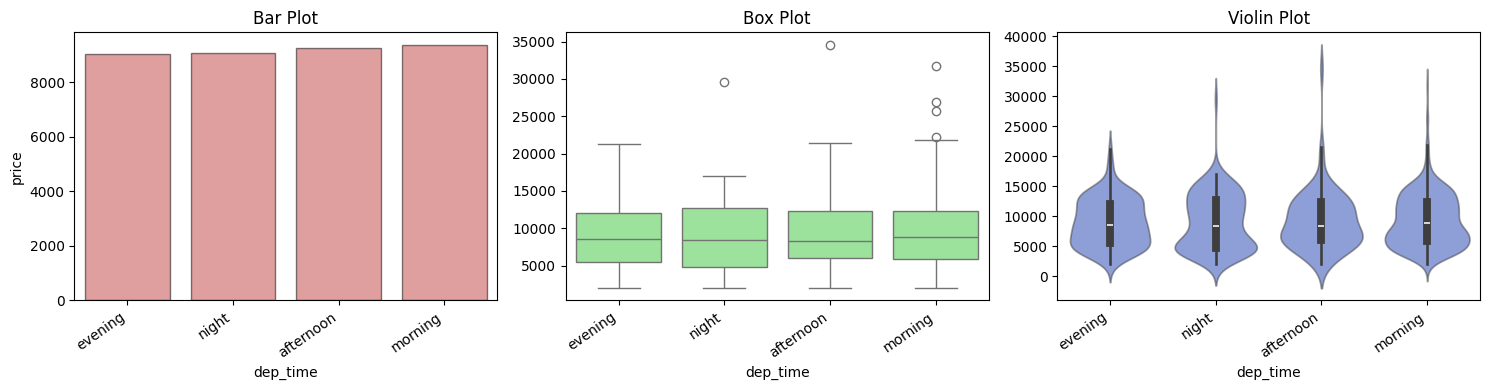

In [43]:
(
	train
	.assign(dep_time=lambda df_: (  #np.select it takes three argument( 2 list and one default value   # We will change dep_time column
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),   #  <=4 and >12
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")  # If not satisfy three conditions inside list then will add night as default
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [45]:
train.duration

0       310
1       920
2       185
3       490
4       575
       ... 
635    1275
636     175
637     745
638     630
639    1630
Name: duration, Length: 640, dtype: int64

In [47]:
eda_helper_functions.num_summary(train, "duration")

0       310
1       920
2       185
3       490
4       575
       ... 
635    1275
636     175
637     745
638     630
639    1630
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,135.0
10,150.0
25,175.0
50,550.0
75,930.0
90,1435.5
95,1600.5
99,1836.1


,value
mean,652.859375
trimmed mean (5%),620.894097
trimmed mean (10%),594.091797
median,550.000000


,value
var,252172.014622
std,502.167317
IQR,755.000000
mad,375.000000
coef_variance,0.769181


,value
skewness,0.785062
kurtosis,-0.361510


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3849221087611615e-20
Test Statistic       : 0.8940048003128521
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.158444362628302
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [48]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    550.0
0.75    930.0
Name: duration, dtype: float64

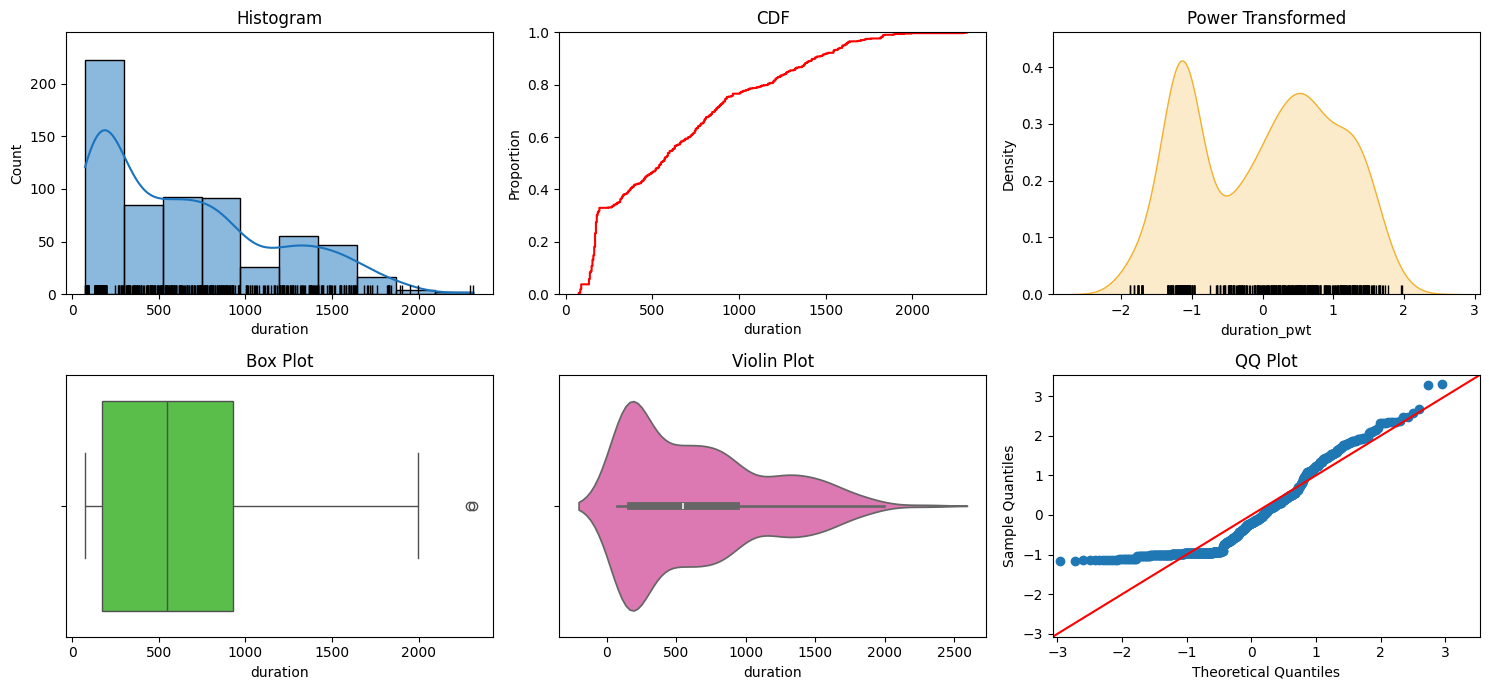

In [49]:
eda_helper_functions.num_univar_plots(train, "duration")

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


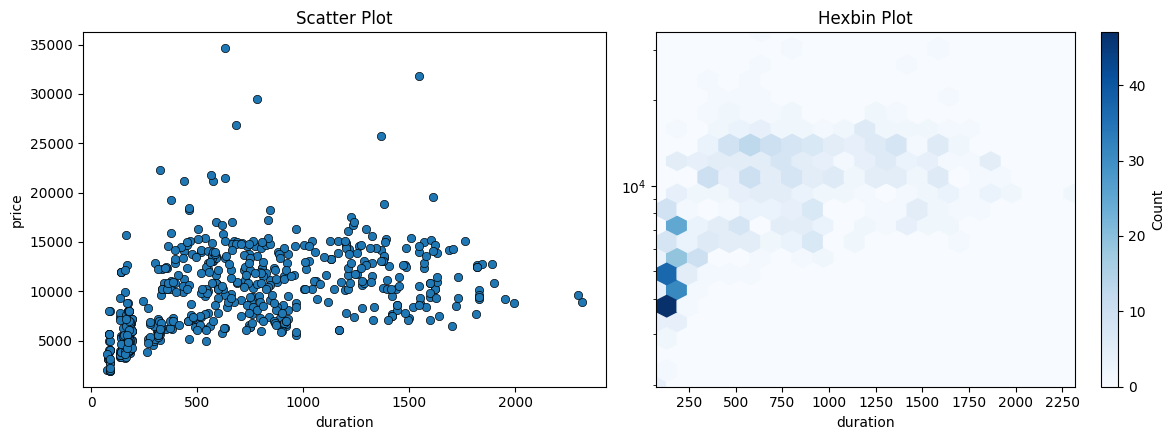

In [50]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [52]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5076990125339036
- p-value              : 3.1317679240585808e-43
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6653340838986966
- p-value              : 4.846969055352809e-83
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


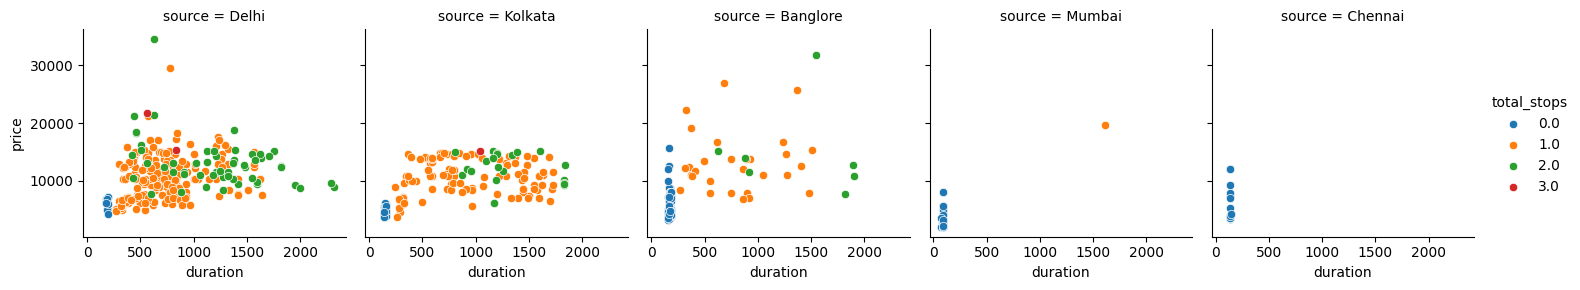

In [53]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True  # y axis is constant for every plot
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

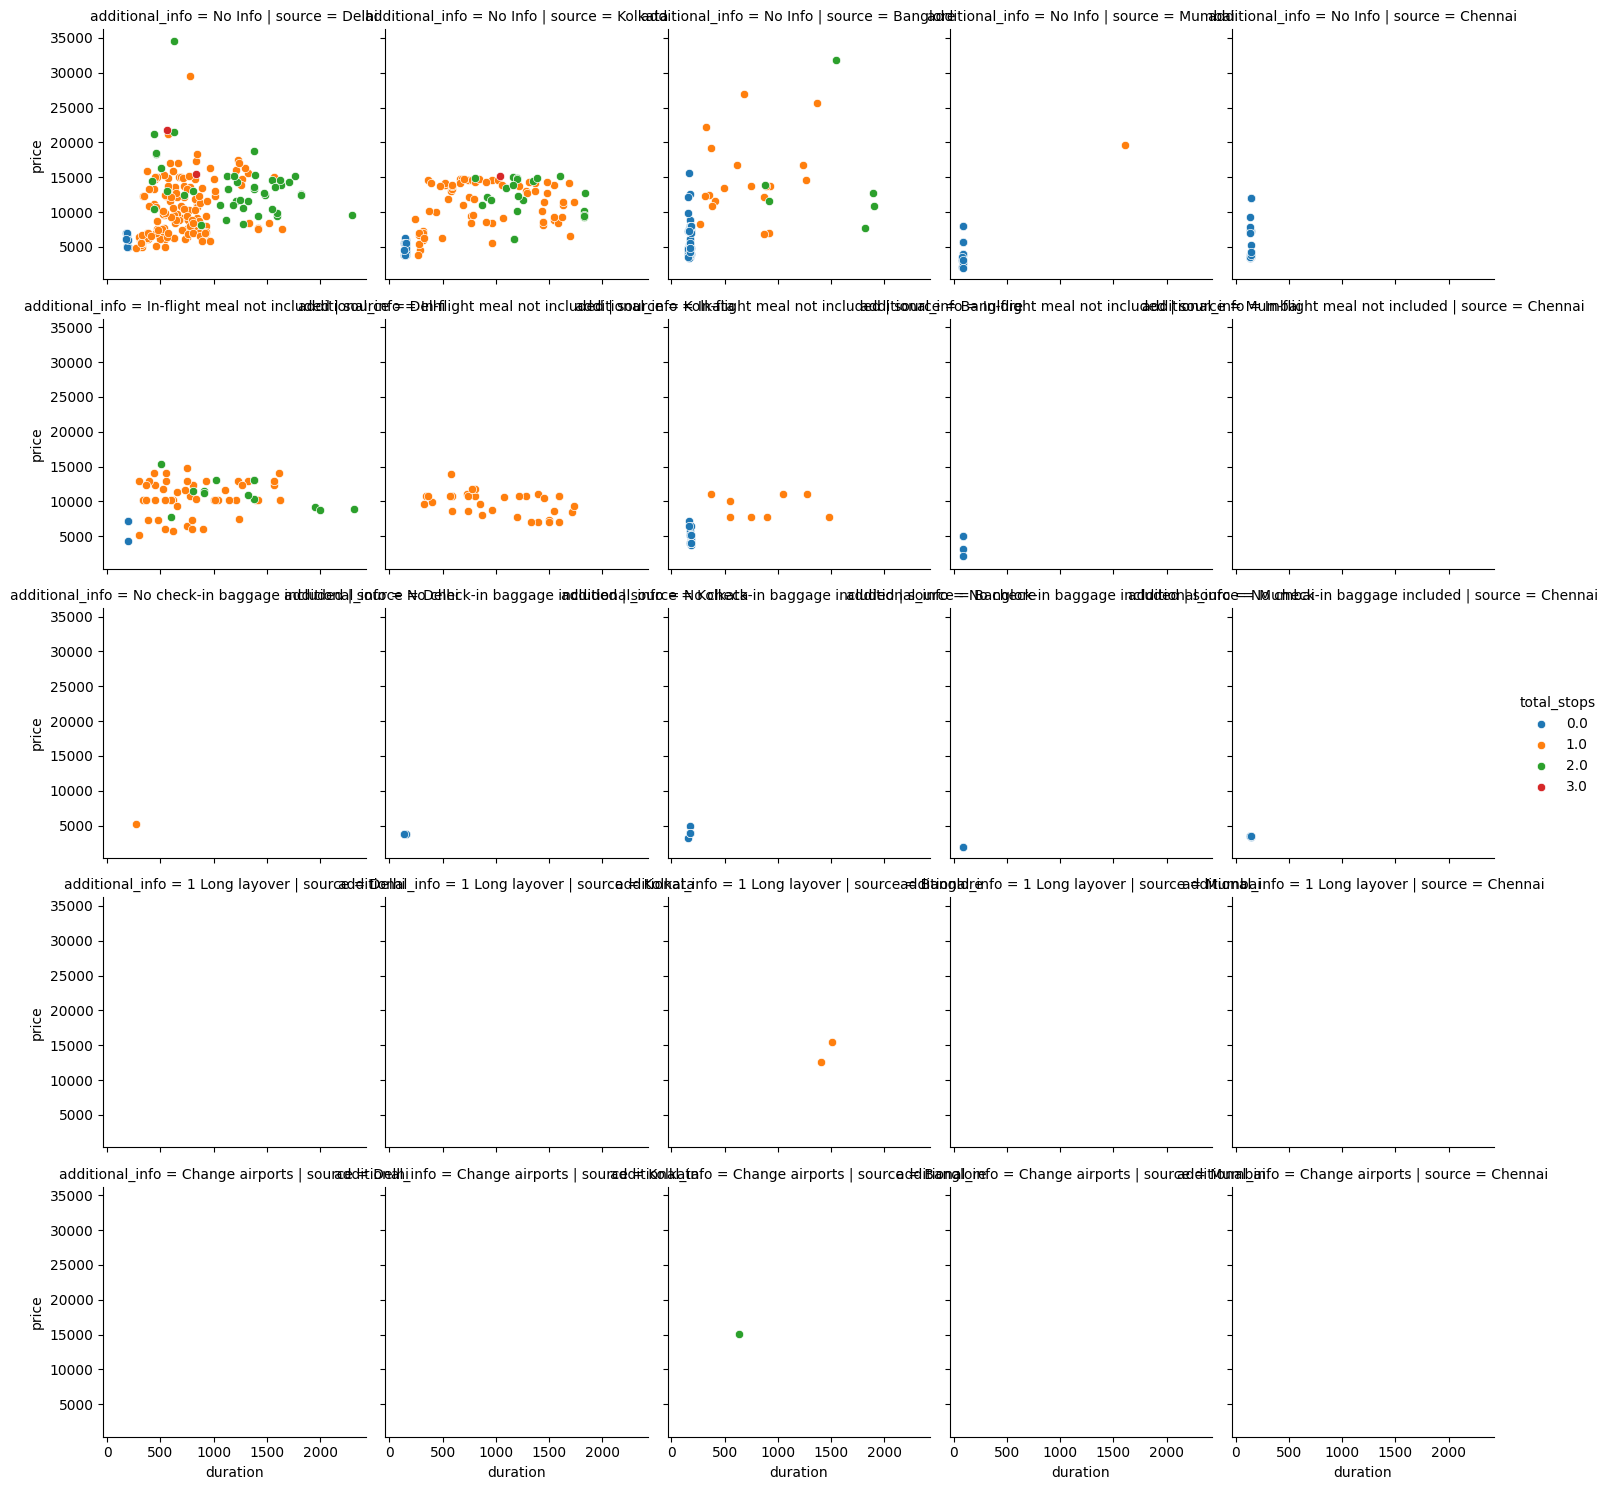

In [54]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [55]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -957.5
Upper Limit : 2062.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
175,Air India,2019-05-09,Delhi,Cochin,2024-11-17 05:00:00,2024-11-17 19:15:00,2295,2.0,No Info,9653
158,Jet Airways,2019-03-27,Delhi,Cochin,2024-11-17 05:10:00,2024-11-17 19:45:00,2315,2.0,In-flight meal not included,8938


### 8.5 additional_info

In [56]:
eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635    In-flight meal not included
636                        No Info
637    In-flight meal not included
638                Change airports
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,485


,count,percentage
category,,
No Info,485,0.757812
In-flight meal not included,131,0.204687
No check-in baggage included,21,0.032813
1 Long layover,2,0.003125
Change airports,1,0.001563


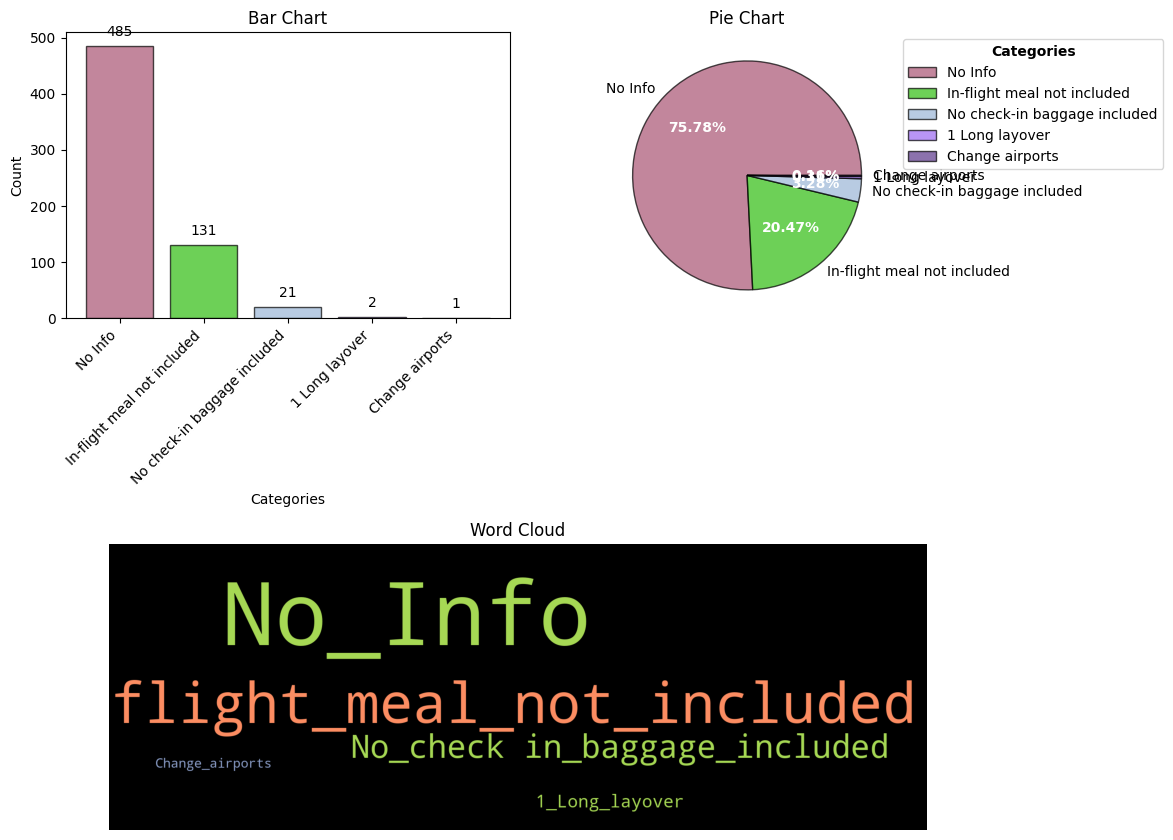

In [57]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

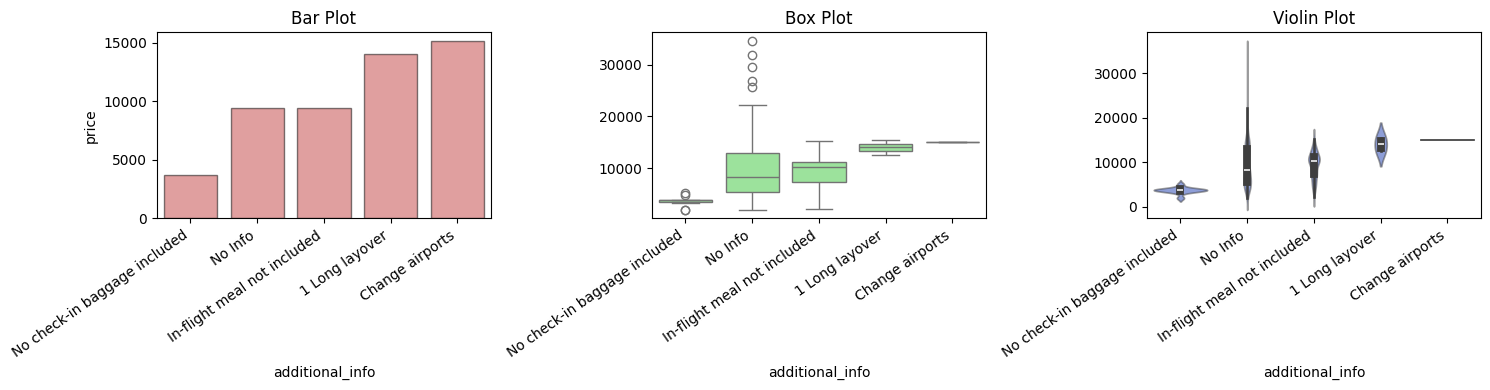

In [58]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

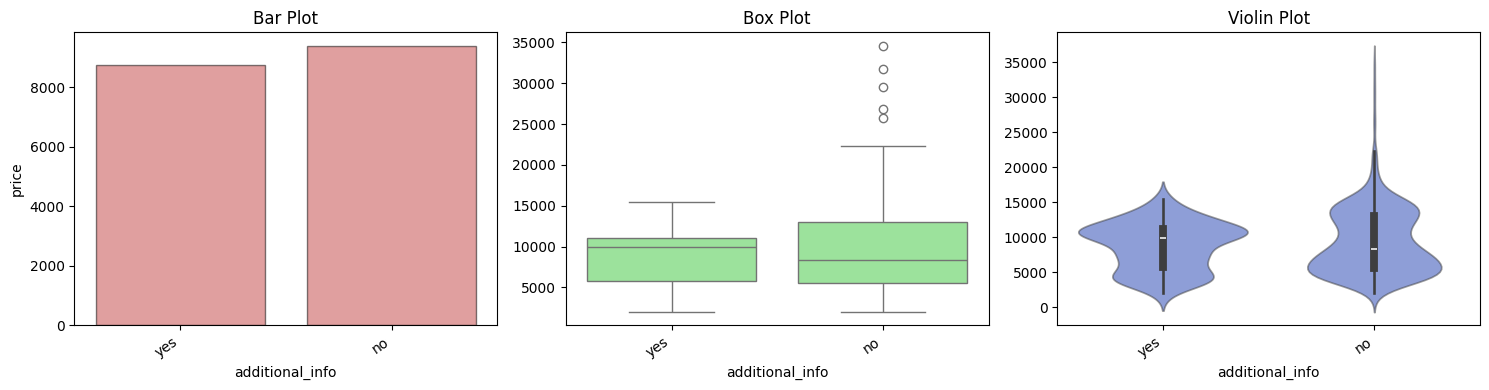

In [59]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [63]:
import numpy as np

In [68]:
#from ydata_profiling import ProfileReport

In [69]:
# report = ProfileReport(train)

In [47]:
# report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]